In [3]:
!pip install pandas matplotlib seaborn scikit-learn pyarrow

   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.8 MB 660.6 kB/s eta 0:00:38
   ---------------------------------------- 0.0/24.8 MB 393.8 kB/s eta 0:01:03
   ---------------------------------------- 0.1/24.8 MB 655.4 kB/s eta 0:00:38
   ---------------------------------------- 0.1/24.8 MB 708.1 kB/s eta 0:00:35
   ---------------------------------------- 0.2/24.8 MB 981.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.8 MB 923.9 kB/s eta 0:00:27
    --------------------------------------- 0.4/24.8 MB 1.1 MB/s eta 0:00:22
    --------------------------------------- 0.4/24.8 MB 1.1 MB/s eta 0:00:24
    --------------------------------------- 0.5/24.8 MB 1.2 MB/s eta 0:00:20
   - -------------------------------------- 0.7/24.8 MB 1.5 MB/s eta 0:00:16
   - -------------------------------------- 0.8/24.8 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 1.1/24.8 MB 1.9 MB/s eta 0:

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [97]:
url = "https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv"
df = pd.read_csv(url)


In [98]:

class DataSet:
    def __init__(self, dataframe):
        self.df = dataframe

    def clean(self):
        try:
            df.drop('ID', axis=1, inplace=True)
        except:
            pass

    def summarize_dataset(self):
        print(f"Dataset shape: {self.df.shape}")
        print("\nSample 10 rows from datase:")
        display(self.df.sample(10, random_state = 31))
    
        print("\nDescribe the dataset:")
        display(self.df.describe())
    
        print("\nNaN values count:")
        display(pd.DataFrame({"Column" : self.df.isna().sum().index, "Count" : self.df.isna().sum().values}))
    
    def show_displot_number_1(self, hue=None):
        sns.displot(data=self.df, x='Income', hue=hue, kde=True, multiple='stack', height=6, aspect=2)
        plt.title("Incoome Distrubition")
        plt.show()
    
        print()
    
        sns.displot(data=self.df, x='CCAvg', hue=hue, kde=True, multiple='stack', height=6, aspect=2)
        plt.title("CCAvg Distrubition")
        plt.show()
    
    def show_displot_number_2(self, hue=None):
        sns.displot(data=self.df, x='Education', hue=hue, kde=True, multiple='stack', height=6, aspect=2)
    
        plt.xticks(np.arange(3) + 1, ['undergraduate', 'graduate', 'advancedl'], rotation=90)
        plt.title("Bank users uses credit cards")
    
        plt.show()

    def show_heatmap(self):
        plt.figure(figsize=(12, 12))
        sns.heatmap(data=self.df.corr(), square=True, annot=True, cmap="coolwarm", linewidths=0.1)
        plt.title("Dataset corelation")
        plt.show()

    def show_pie_chart(self):
        figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 9))
    
        palette_color = sns.color_palette('bright')
    
        ax1.set_title("Providing personal loans to customers")
        ax1.pie(self.df['Personal Loan'].value_counts(), labels=['no accepted', 'accepted'], colors=['red', 'green'], autopct='%.0f%%', shadow=True)
    
        ax2.set_title("Customers education level")
        ax2.pie(self.df['Education'].value_counts(), labels=['undergraduate', 'graduate', 'advanced/professional'], colors=palette_color, autopct='%.0f%%', shadow=True)
    
        ax3.set_title("Does the customer use a credit card \nissued by Universal Bank")
        ax3.pie(self.df['CreditCard'].value_counts(), labels=['no use', 'use'], colors=palette_color, autopct='%.0f%%', shadow=True)
    
        plt.show

    def show_scatter_plot(self, hue=None):
        figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
    
        ax1.set_title("ax1")
        sns.scatterplot(data=self.df, x='Experience', y='Income', hue=hue, ax=ax1)
    
        ax2.set_title("ax2")
        sns.scatterplot(data=self.df, x='Age', y='Income', hue=hue, ax=ax2)
    
        ax2.set_title("ax3")
        sns.scatterplot(data=self.df, y='Income', x='Mortgage', hue=hue, ax=ax3)
    
        plt.show()

    def show_pair_plot(self, hue=None, columns=None):
        sns.pairplot(data=self.df[columns], hue=hue)
        plt.title("Some are contradictory")
        plt.show()
    
    def replace_data(self):
        hue = df['Personal Loan'].astype(str).replace({'1' : 'given', '0' : 'not given'})
        return hue
    
    def plot(self, figsize=(20, 16), bins=100):
        self.df.hist(figsize=figsize, bins=bins)
        plt.show()


Dataset shape: (5000, 13)

Sample 10 rows from datase:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3914,27,3,35,94080,1,1.8,2,0,0,0,0,0,0
557,39,15,118,95039,2,1.9,1,0,0,0,0,0,1
3013,45,21,183,90029,2,1.4,1,0,0,0,0,1,1
3321,41,15,120,94521,1,5.2,1,0,0,0,0,1,0
1339,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
2177,31,7,108,94507,1,4.0,1,0,0,0,0,1,0
4866,41,17,71,94801,2,3.2,1,0,0,0,0,1,1
3710,49,22,23,90032,2,1.0,2,0,0,0,0,1,1
3267,59,35,21,95818,2,1.0,1,120,0,0,0,1,0
669,56,29,41,94109,4,2.5,2,0,0,0,0,0,0



Describe the dataset:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



NaN values count:


,Column,Count
0,Age,0
1,Experience,0
2,Income,0
3,ZIP Code,0
4,Family,0
5,CCAvg,0
6,Education,0
7,Mortgage,0
8,Personal Loan,0
9,Securities Account,0


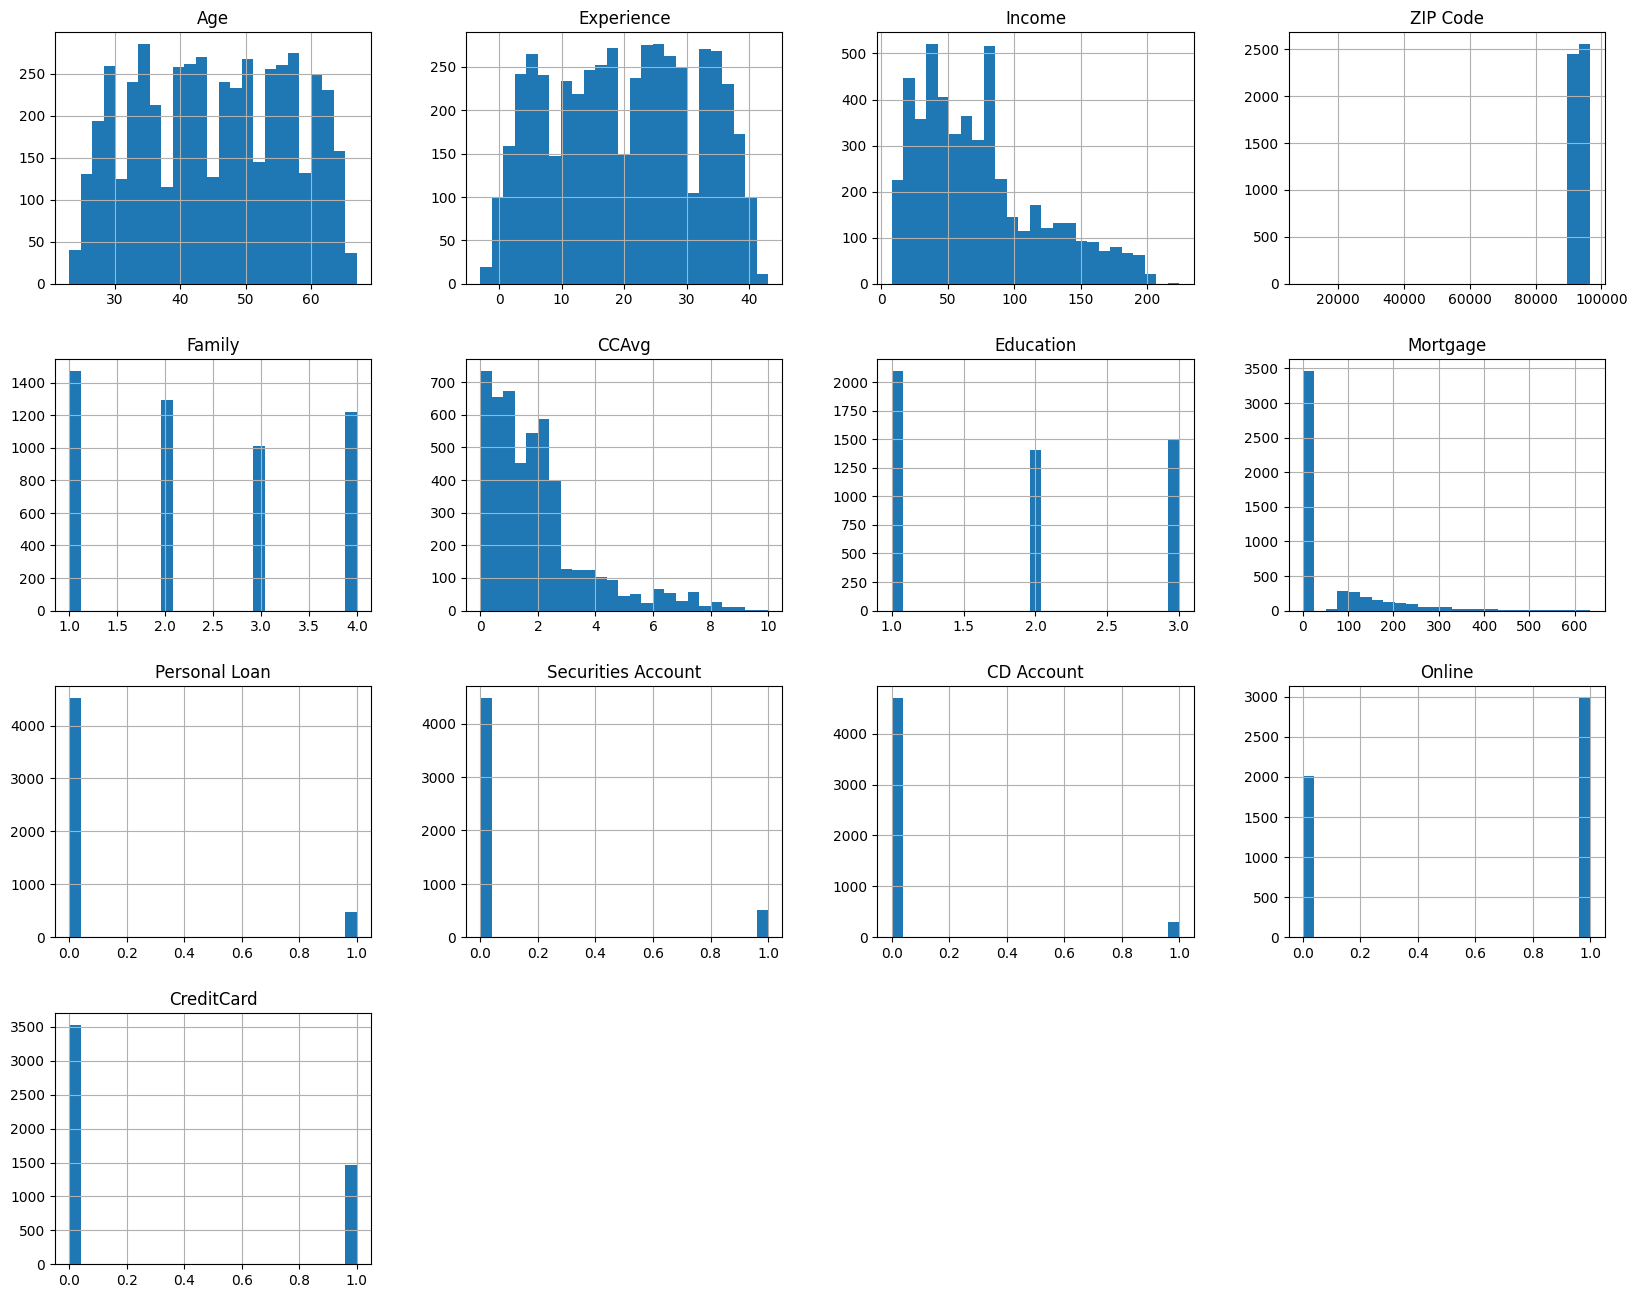

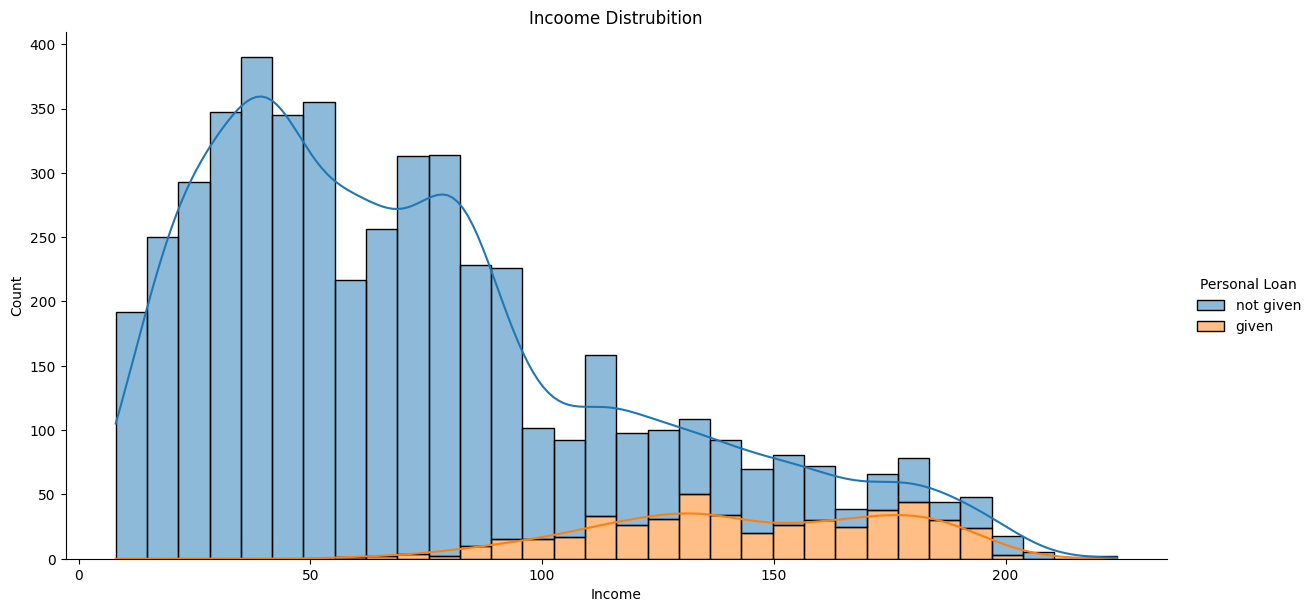

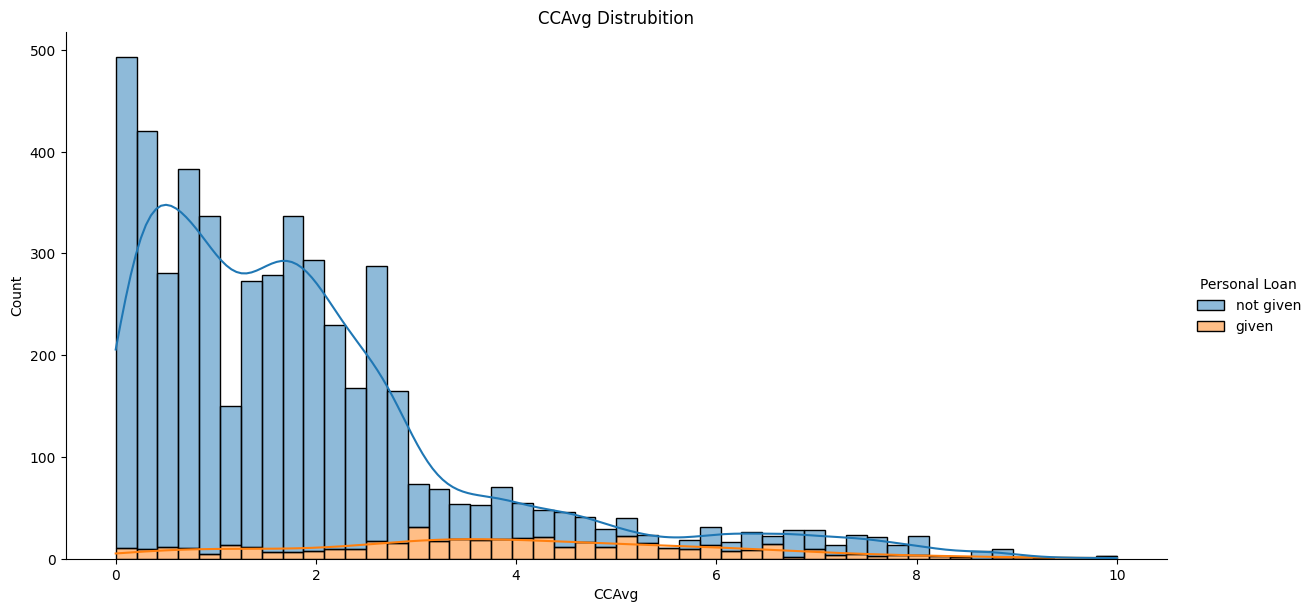

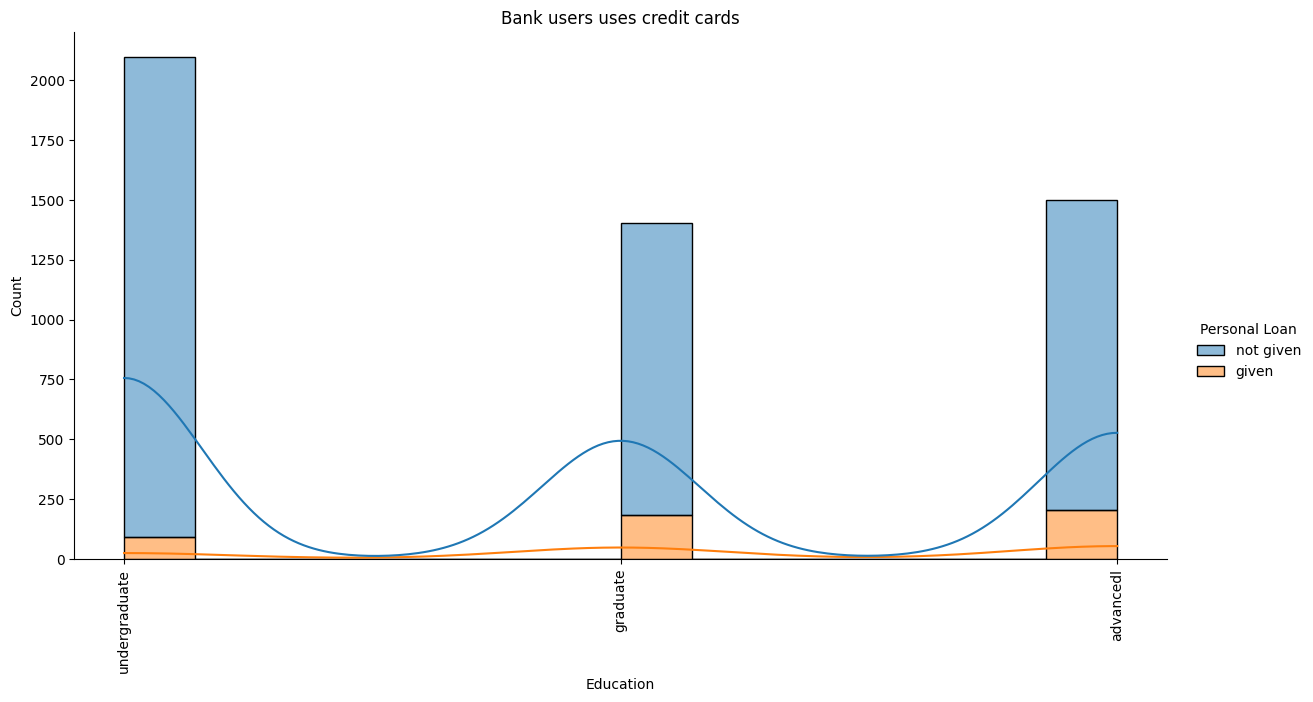

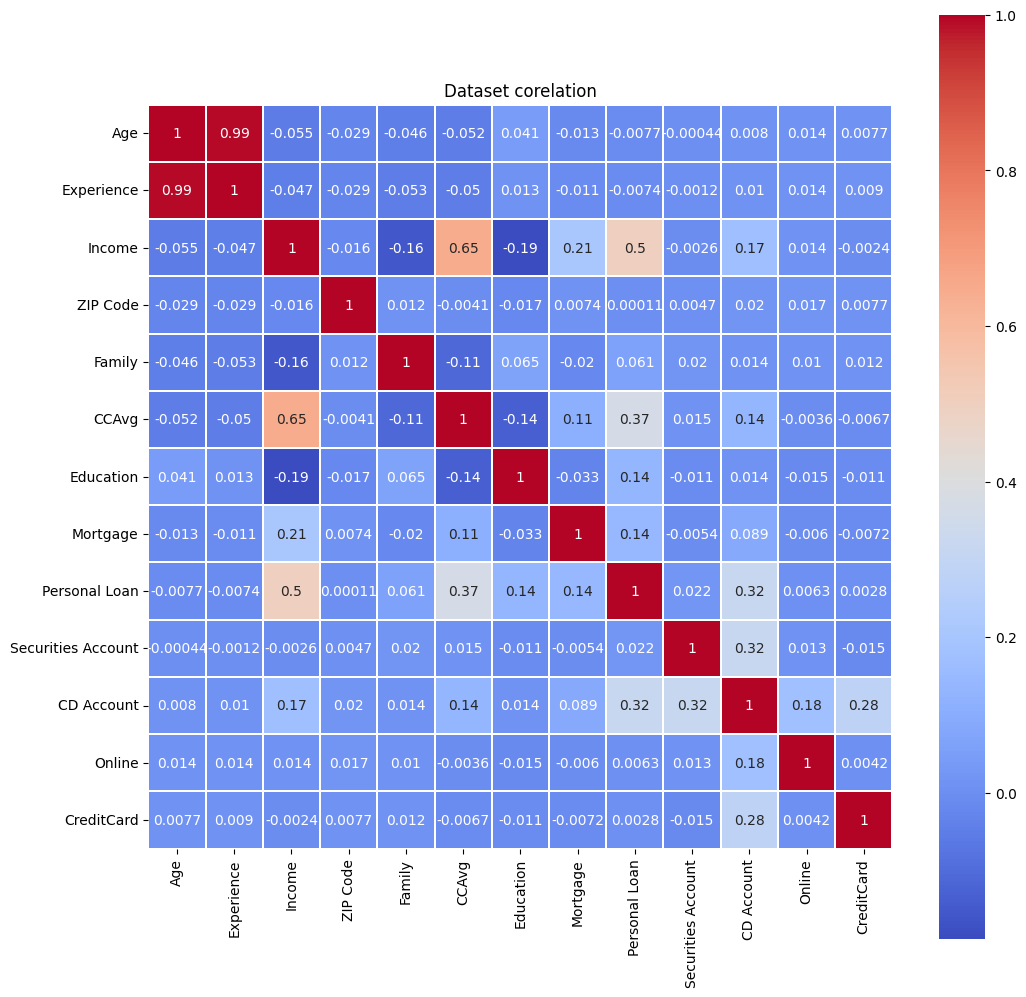

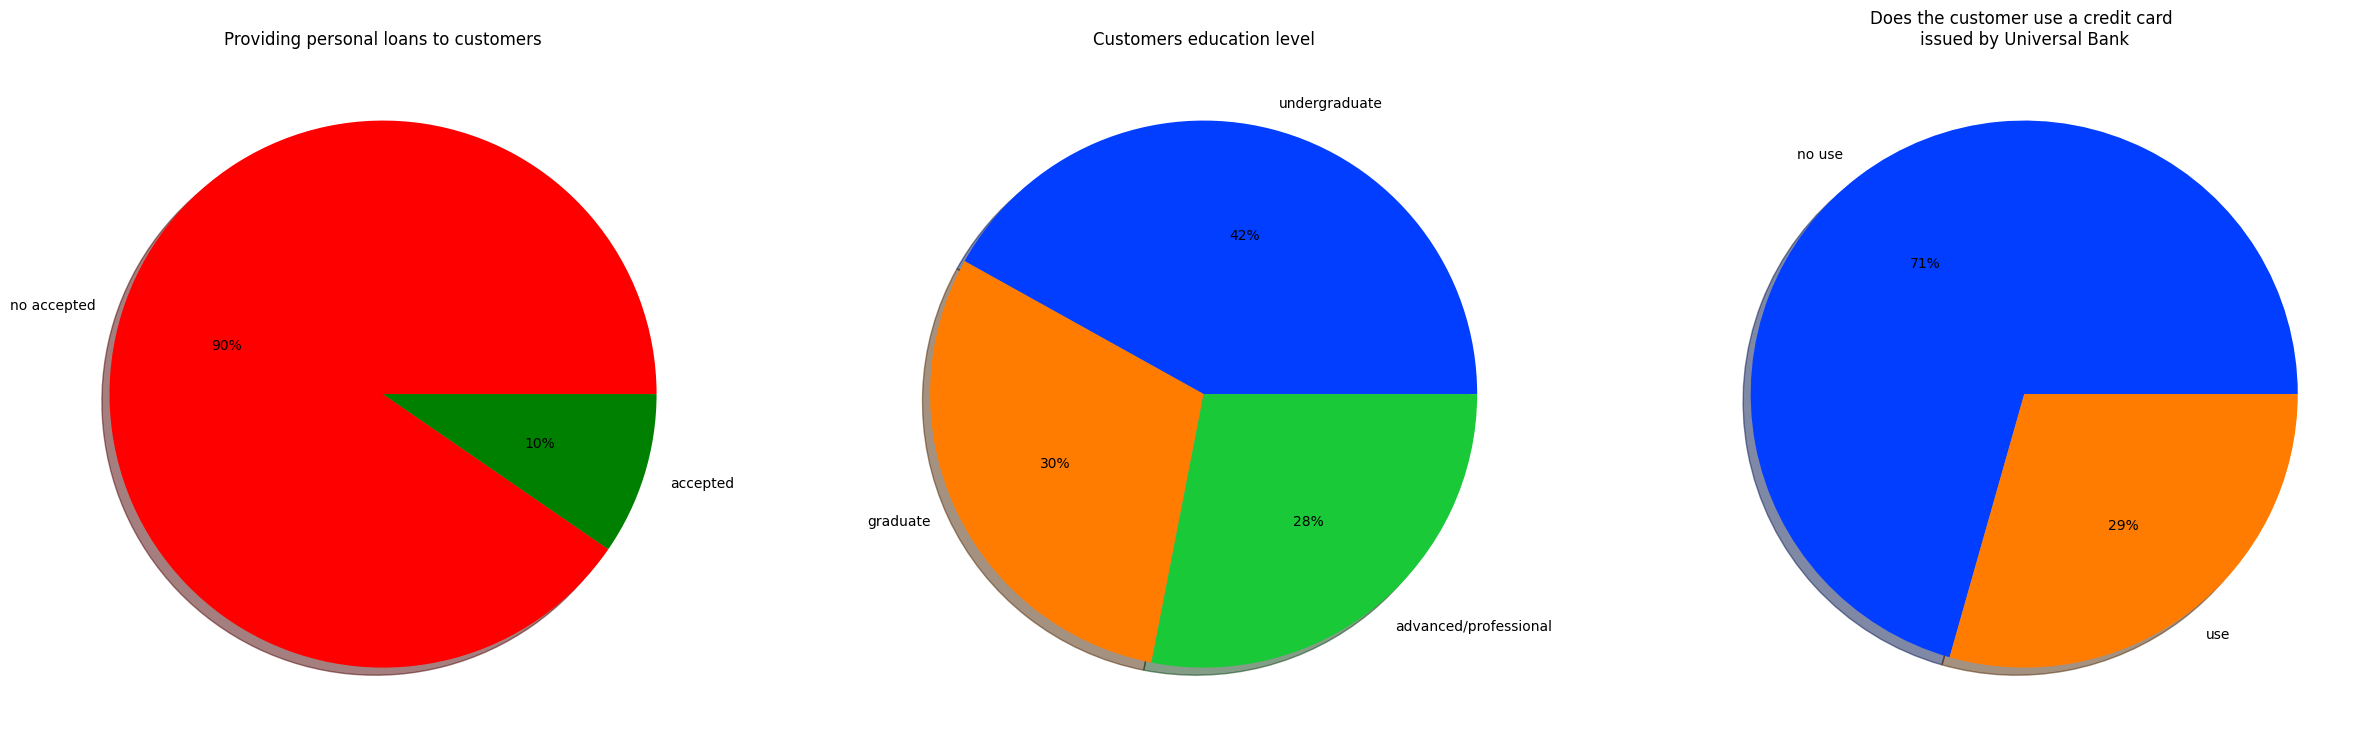

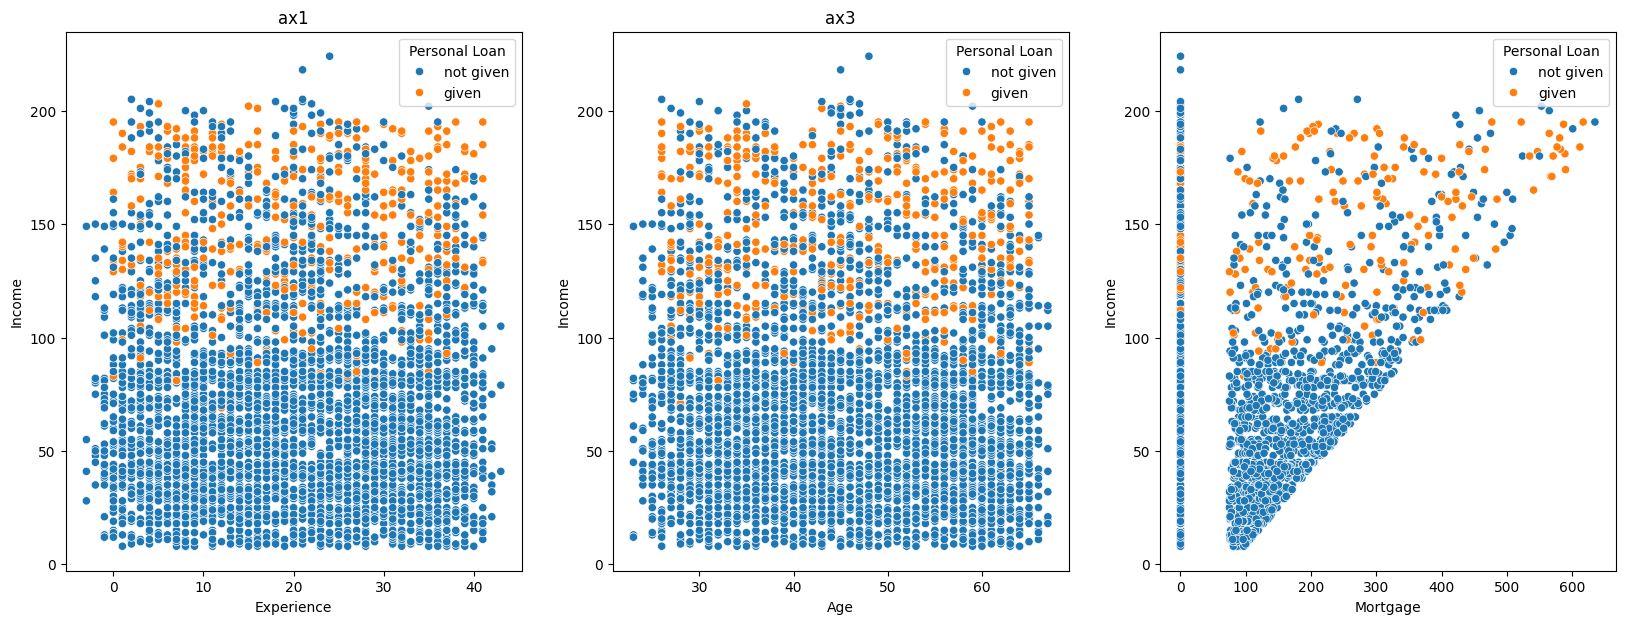

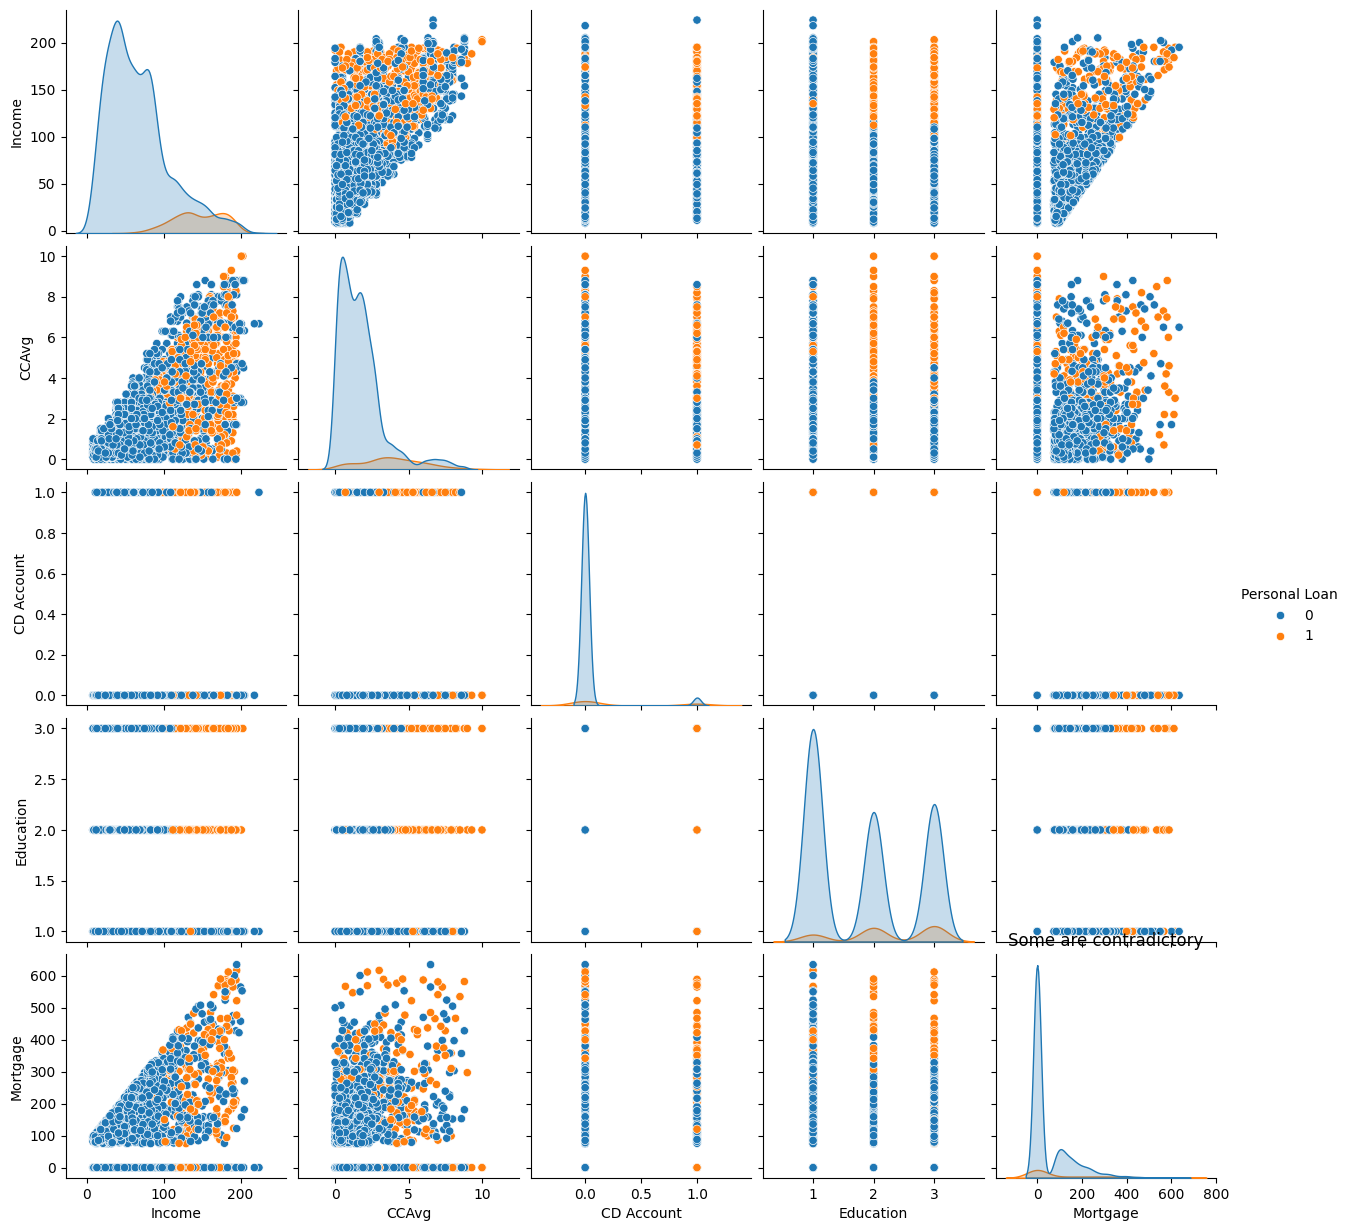

In [99]:
dataset = DataSet(df)

dataset.clean()
dataset.summarize_dataset()
dataset.plot(bins=25)
hue = dataset.replace_data()
dataset.show_displot_number_1(hue)
dataset.show_displot_number_2(hue)
dataset.show_heatmap()
dataset.show_pie_chart()
dataset.show_scatter_plot(hue)
dataset.show_pair_plot(hue='Personal Loan', columns=['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage', 'Personal Loan'])

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, accuracy_score, classification_report, mean_squared_error, confusion_matrix


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [102]:
class Score:
    def __init__(self, model):
        self.model = model
        self.model_name = str(model)
        self.accuracy_score = None
        self.cross_val_score = None
        self.mean_cross_val_score = None
        self.mean_squared_error = None
        self.confusion_matrix = None

    def display(self):
        print(f"Model : {self.model_name}")
        print(f"Accuracy score : {int(self.accuracy_score * 100)}%")
        print(f"Cross validation score: {int(self.mean_cross_val_score * 100)}%")
        print(f"Mean squared error: {self.mean_squared_error}")
        matrix = self.confusion_matrix
        print(f"Confusion_matrix:\n{matrix[0][0]} {matrix[0][1]} \n{matrix[1][0]}  {matrix[1][1]}\n\n")


In [103]:
class MLClass:
    def __init__(self, models, x=None, y=None, test_size=0.2):
        self.models = models
        self.fited_models = []
        self.scores = []
        self.X = x
        self.Y = y
        self.X_tarin, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)

    def fit(self):
        for model in self.models:
            model.fit(self.X_tarin, self.y_train)
            self.fited_models.append(model)

        return self.fited_models

    def predict(self):
        for model in self.fited_models:
            y_predict = model.predict(self.X_test)

            score = Score(model)
            score.accuracy_score = accuracy_score(self.y_test, y_predict)
            score.cross_val_score = cross_val_score(model, self.X, self.Y, cv=10)
            score.mean_cross_val_score = np.mean(score.cross_val_score)
            score.mean_squared_error = mean_squared_error(self.y_test, y_predict)
            score.confusion_matrix = confusion_matrix(self.y_test, y_predict)

            self.scores.append(score)
        return self.scores


    def display(self):
        for score in self.scores:
            score.display()
    
    def get(self, model_name):
        for score in self.scores:
            if score.model_name == model_name:
                return score
        return None


In [104]:
regresssions_and_classifiers = [
    LogisticRegression(max_iter=3000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier()
]

In [105]:
x_df_data = df[['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage']]
y_df_data = df['Personal Loan']

In [106]:
mlc = MLClass(regresssions_and_classifiers, x=x_df_data, y=y_df_data)
mlc.fit()
mlc.predict()
mlc.display()

Model : LogisticRegression(max_iter=3000)
Accuracy score : 95%
Cross validation score: 94%
Mean squared error: 0.049
Confusion_matrix:
898 18 
31  53


Model : DecisionTreeClassifier()
Accuracy score : 96%
Cross validation score: 95%
Mean squared error: 0.037
Confusion_matrix:
897 19 
18  66


Model : RandomForestClassifier()
Accuracy score : 97%
Cross validation score: 97%
Mean squared error: 0.022
Confusion_matrix:
910 6 
16  68


Model : GradientBoostingClassifier()
Accuracy score : 97%
Cross validation score: 97%
Mean squared error: 0.026
Confusion_matrix:
909 7 
19  65


Model : GaussianNB()
Accuracy score : 88%
Cross validation score: 88%
Mean squared error: 0.116
Confusion_matrix:
834 82 
34  50


Model : SVC()
Accuracy score : 92%
Cross validation score: 90%
Mean squared error: 0.08
Confusion_matrix:
912 4 
76  8


Model : KNeighborsClassifier()
Accuracy score : 93%
Cross validation score: 92%
Mean squared error: 0.07
Confusion_matrix:
891 25 
45  39




In [107]:
import pickle


def save_model(model, file_name):
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)
    print(f"{file_name} saved")

def open_model(file_name):
    with open(file_name, 'rb') as file:
        return pickle.load(file)

In [108]:
random_forest_score = ml.get("RandomForestClassifier()")
gradient_boosting_score = ml.get("GradientBoostingClassifier()")

save_model(random_forest_score.model, 'RandomForest.pkl')
save_model(gradient_boosting_score.model, 'GradientBoosting.pkl')


RandomForest.pkl saved
GradientBoosting.pkl saved


In [109]:
open_model('RandomForest.pkl')


RandomForestClassifier()